<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Example usage:

### Helper functions:

Before starting with the example usage, let´s quickly define two helper functions that we will need:

In [1]:
#| echo: false
#| output: asis
show_doc(get_only_matching_xlsx_files)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L17){target="_blank" style="float:right; font-size:smaller"}

### get_only_matching_xlsx_files

>      get_only_matching_xlsx_files (dir_path:pathlib.Path, paradigm_id:str,
>                                    week_id:Union[int,NoneType]=None)

In [2]:
#| echo: false
#| output: asis
show_doc(get_metadata_from_filename)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L31){target="_blank" style="float:right; font-size:smaller"}

### get_metadata_from_filename

>      get_metadata_from_filename (filepath_session_results:pathlib.Path,
>                                  group_assignment_filepath:pathlib.Path)

### 1) Load all data:

This obviously assumes that you were using the `gait_analysis` package to analyze your 2D tracking data created the corresponding result exports. To get some quick insights into your data, feel free to use the following collection of functions.

First, you need to provide the filepath to the exported Excel files as `root_dir_path` as a Path object (see exmaple below). You can also specify if you´d like to right away filter only for a certain set of weeks or paradigms (you can also just pass a list with a single value for each). Please note that you have to provide the exact name of the respective Excel Tab you are interested in as:  `sheet_name`.

Note: The group_assignment Excel Sheet is still quite customized & should be replaced by a more generalizable configs file (e.g. .yaml) in future versions.

In [3]:
#| echo: false
#| output: asis
show_doc(collect_all_available_data)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L63){target="_blank" style="float:right; font-size:smaller"}

### collect_all_available_data

>      collect_all_available_data (root_dir_path:pathlib.Path,
>                                  group_assignment_filepath:pathlib.Path,
>                                  paradigm_ids:List[str], week_ids:List[str],
>                                  sheet_name:str)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| root_dir_path | Path | Filepath to the directory that contains the exported results .xlsx files |
| group_assignment_filepath | Path | Filepath to the group_assignments.xlsx file |
| paradigm_ids | typing.List[str] | List of paradigms of which the results shall be loaded |
| week_ids | typing.List[str] | List of weeks from which the results shall be loaded |
| sheet_name | str | Tab name of the exported results sheet to load, e.g. "session_overview" |
| **Returns** | **DataFrame** |  |

For instance, if you´d like to inspect the overall session overview, use:

In [ ]:
df = collect_all_available_data(root_dir_path = Path('/mnt/c/Users/dsege/Downloads/DLC_data/22_11_14/analyses/'),
                                group_assignment_filepath = Path('/home/ds/GitHub_repos/Gait_Analysis/test_data/group_assignment.xlsx'),
                                paradigm_ids = ['OTR', 'OTT', 'OTE'],
                                week_ids = [1, 4, 8, 12, 14],
                                sheet_name = 'session_overview')
df.head()

,bout_type,total_bouts_count,total_duration,total_distance_covered,mean_duration,mean_distance_covered,mean_CenterOfGravity_x,line_id,paradigm_id,subject_id,week_id,group_id
0,all_immobility_bouts,294,313.966667,128.689652,1.067914,0.437720,6.123941,194,OTR,194_F8-15,1,ctrl
1,towards_open_immobility_bouts,101,136.900000,40.349485,1.355446,0.399500,7.376987,194,OTR,194_F8-15,1,ctrl
2,towards_closed_immobility_bouts,193,177.066667,88.340167,0.917444,0.457721,5.468203,194,OTR,194_F8-15,1,ctrl
3,all_freezing_bouts,172,281.700000,106.806273,1.637791,0.620967,4.778097,194,OTR,194_F8-15,1,ctrl
4,towards_open_freezing_bouts,71,129.133333,35.389289,1.818779,0.498441,4.368076,194,OTR,194_F8-15,1,ctrl


### 2) Filter your data (optional):

You might want to filter your data to only inspect a specific proportion of it. You can do so quite easily by using the `filter_dataframe()` funtion (see example usage below):

In [4]:
#| echo: false
#| output: asis
show_doc(filter_dataframe)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L91){target="_blank" style="float:right; font-size:smaller"}

### filter_dataframe

>      filter_dataframe (df:pandas.core.frame.DataFrame,
>                        filter_criteria:List[Tuple])

You need to specify your filter criteria in a list of tuples, for which each tuple follows this schema:
> (column_name, comparison_method, reference_value)

So for instance, if you´d like to filter your dataframe by selecting only the data of all freezing bouts, you would add a tuple that specifies that you want all rows from the column "bout_type" that have the value "all_freezing_bouts": 
> `('bout_type', 'equal_to', 'all_freezing_bouts')`

You can also add more criteria with additional tuples, for instance to filter for specific mouse lines your filter criteria would look like this:
> `('line_id', 'is_in_list', ['206', '209'])` 

Bringing it together, you´d define your filter_criteria in a list of these tuples:

In [ ]:
filter_criteria = [('line_id', 'is_in_list', ['206', '209']),
                   ('bout_type', 'equal_to', 'all_freezing_bouts')]

You can add as many tuples (= criteria) you´d like. Currently implemented comparison methods include:
- "greater": selects only rows in which the values of the column are greater than the reference value
- "smaller": selects only rows in which the values of the column are smaller than the reference value
- "equal_to": selects only rows in which the values of the column are equal to the reference value
- "is_in_list": selects only rows in which the values of the column are matching to an element in the reference value (which has to be a list, in this case)
- "is_nan": selects only rows in which the values of the column are NaN

You can then pass the `filter_criteria` along your dataframe to the `filter_dataframe()` function:

In [ ]:
df_filtered = filter_dataframe(df = df, filter_criteria = filter_criteria)

As quick confirmation that the filtering was applied, let´s compare the unique event types between the original (`df`) and the filtered (`df_filtered`) DataFrame:

In [ ]:
df['bout_type'].unique()

array(['all_immobility_bouts', 'towards_open_immobility_bouts',
       'towards_closed_immobility_bouts', 'all_freezing_bouts',
       'towards_open_freezing_bouts', 'towards_closed_freezing_bouts',
       'all_gait_disruption_bouts', 'towards_open_gait_disruption_bouts',
       'towards_closed_gait_disruption_bouts', 'all_gait_bouts',
       'towards_open_gait_bouts', 'towards_closed_gait_bouts'],
      dtype=object)

In [ ]:
df_filtered['bout_type'].unique()

array(['all_freezing_bouts'], dtype=object)

Great! We only have "freezing" events left!

### 3) Plotting:

Eventually, you can also plot your data, filtering it even more, if you´d like to. When you´re using the `plot()` function, you can specify the following parameters (see function documentation and example usage below):

In [5]:
#| echo: false
#| output: asis
show_doc(plot)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L127){target="_blank" style="float:right; font-size:smaller"}

### plot

>      plot (df:pandas.core.frame.DataFrame, x_column:str, y_column:str,
>            plot_type:str='violinplot', hue_column:Union[str,NoneType]=None,
>            hide_legend:bool=True)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | the DataFrame that contains the data you´d like to plot |
| x_column | str |  | the column name of the data that should be visualized on the x-axis |
| y_column | str |  | the column name of the data that should be visualized on the y-axis |
| plot_type | str | violinplot | currently only "violinplot" and "stripplot" are implemented |
| hue_column | typing.Union[str, NoneType] | None | if you´d like to use the data of a column to color-code the plotted, you can specify it here (see example below) |
| hide_legend | bool | True | pass along as `False` if you´d like the legend of the plot to be displayed |
| **Returns** | **None** |  |  |

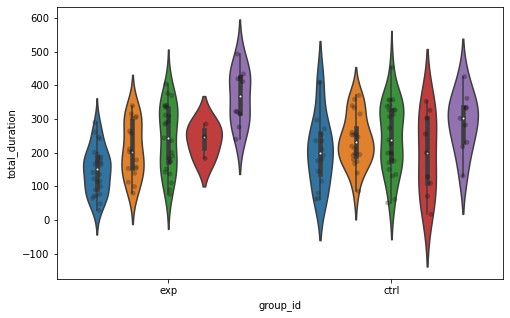

In [ ]:
plot(df = df_filtered, x_column = 'group_id', y_column = 'total_duration', hue_column = 'week_id')

You can also use the following function to create a DataFrame that gives you an overview of your data availability:

In [6]:
#| echo: false
#| output: asis
show_doc(check_data_availability)

---

[source](https://github.com/Defense-Circuits-Lab/Gait_Analysis/blob/main/gait_analysis/inspect.py#L159){target="_blank" style="float:right; font-size:smaller"}

### check_data_availability

>      check_data_availability (root_dir_path:pathlib.Path,
>                               all_week_ids:List[int],
>                               all_paradigm_ids:List[str])